In [2]:
import pandas as pd
import numpy as np
import cvxpy as cp

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
import MyDecoder as decoder

# for automatically reloading the imported modules
%load_ext autoreload
%autoreload 2

In [4]:
def make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,c,test):
    AVG_Hamming_err_list = np.average(Hamming_err_lists,axis=0)
    AVG_FN_list = np.average(FN_lists,axis=0)
    AVG_FP_list = np.average(FP_lists,axis=0)

    plt.subplot(1,3,1)
    for i in range(num_trial):
        #plt.plot(T_list, Hamming_err_lists[i], label = "Hamming Err", color='blue', alpha=0.3)
        plt.plot(T_list, Hamming_err_lists[i],'o', color=c, alpha=0.3);   
    plt.plot(T_list, AVG_Hamming_err_list, label = test, linewidth = 3, color=c)
    plt.plot(T_list, AVG_Hamming_err_list,'o', color=c)
    plt.xlabel("T (number of tests)")
    plt.ylabel("Hamming Error Rate")
    plt.title("T (number of tests) vs Hamming, p = "+str(p)+", n = "+str(n))
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(1,3,2)
    for i in range(num_trial):
        plt.plot(T_list, FN_lists[i],'o', color=c, alpha=0.3);   
    plt.plot(T_list, AVG_FN_list, label = test, linewidth = 3, color=c)
    plt.plot(T_list, AVG_FN_list,'o', color=c)
    plt.xlabel("T (number of tests)")
    plt.ylabel("False Negative")
    plt.title("T (number of tests) vs False Negative, p = "+str(p)+", n = "+str(n))
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(1,3,3)
    for i in range(num_trial):
        plt.plot(T_list, FP_lists[i],'o', color=c, alpha=0.3);   
    plt.plot(T_list, AVG_FP_list, label = test, linewidth = 3, color=c)
    plt.plot(T_list, AVG_FP_list,'o', color=c)
    plt.xlabel("T (number of tests)")
    plt.title("T (number of tests) vs False Positive p = "+str(p)+", n = "+str(n))
    plt.ylabel("False Positive")
    plt.grid(True)
    plt.legend(loc='upper right')

    fig.set_size_inches(18, 4)

In [55]:
def run_lp_trials_z(n, m, p, q, T_list, num_trial,func=decoder.lp,notgroup = 1,R=20):
    Hamming_err_lists = []
    FN_lists = []
    FP_lists = []

    for i in range(num_trial):
        Hamming_err_list = []
        FN_list = []
        FP_list = []

        for T in T_list:
            X, ppl, y, A= decoder.generator_nonoverlapping(n, q, p, m, T)
            y_noisy = decoder.add_noise_zchannel(y,0.1)
            if notgroup:
                ppl_pred  = func(X,y_noisy)
                ppl_pred = np.around(ppl_pred)
            else:
                ppl_pred  = func(X,y_noisy,A,R)
                ppl_pred = np.around(ppl_pred)

            print("Solved Trial: ",i, " for T=",T)
            Hamming_err = sum(ppl_pred != ppl)/n
            Hamming_err_list.append(Hamming_err)

            positive_mask = (ppl == 1)
            FN = sum(ppl_pred[positive_mask] == 0) / sum(positive_mask)
            FN_list.append(FN)

            negative_mask = (ppl == 0)
            FP = sum(ppl_pred[negative_mask] == 1) / sum(negative_mask)
            FP_list.append(FP)

        Hamming_err_lists.append(Hamming_err_list)
        FN_lists.append(FN_list)
        FP_lists.append(FP_list)
        
        print(ppl_pred)
    
    return Hamming_err_lists, FN_lists, FP_lists

Solved Trial:  0  for T= 100
Solved Trial:  0  for T= 300
Solved Trial:  0  for T= 500
Solved Trial:  0  for T= 1000
Solved Trial:  1  for T= 100
Solved Trial:  1  for T= 300
Solved Trial:  1  for T= 500
Solved Trial:  1  for T= 1000
Solved Trial:  2  for T= 100
Solved Trial:  2  for T= 300
Solved Trial:  2  for T= 500
Solved Trial:  2  for T= 1000
Solved Trial:  3  for T= 100
Solved Trial:  3  for T= 300
Solved Trial:  3  for T= 500
Solved Trial:  3  for T= 1000
Solved Trial:  4  for T= 100
Solved Trial:  4  for T= 300
Solved Trial:  4  for T= 500
Solved Trial:  4  for T= 1000
Solved Trial:  5  for T= 100
Solved Trial:  5  for T= 300
Solved Trial:  5  for T= 500
Solved Trial:  5  for T= 1000
Solved Trial:  6  for T= 100
Solved Trial:  6  for T= 300
Solved Trial:  6  for T= 500
Solved Trial:  6  for T= 1000
Solved Trial:  7  for T= 100
Solved Trial:  7  for T= 300
Solved Trial:  7  for T= 500
Solved Trial:  7  for T= 1000
Solved Trial:  8  for T= 100
Solved Trial:  8  for T= 300
Solved

/Users/sunaybhat/.conda/envs/PythonPrograms/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/sunaybhat/.conda/envs/PythonPrograms/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/sunaybhat/.conda/envs/PythonPrograms/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes usi

Solved Trial:  0  for T= 100
Solved Trial:  0  for T= 300
Solved Trial:  0  for T= 500
Solved Trial:  0  for T= 1000
Solved Trial:  1  for T= 100
Solved Trial:  1  for T= 300
Solved Trial:  1  for T= 500
Solved Trial:  1  for T= 1000
Solved Trial:  2  for T= 100
Solved Trial:  2  for T= 300
Solved Trial:  2  for T= 500
Solved Trial:  2  for T= 1000
Solved Trial:  3  for T= 100
Solved Trial:  3  for T= 300
Solved Trial:  3  for T= 500
Solved Trial:  3  for T= 1000
Solved Trial:  4  for T= 100
Solved Trial:  4  for T= 300
Solved Trial:  4  for T= 500
Solved Trial:  4  for T= 1000
Solved Trial:  5  for T= 100
Solved Trial:  5  for T= 300
Solved Trial:  5  for T= 500
Solved Trial:  5  for T= 1000
Solved Trial:  6  for T= 100
Solved Trial:  6  for T= 300
Solved Trial:  6  for T= 500
Solved Trial:  6  for T= 1000
Solved Trial:  7  for T= 100
Solved Trial:  7  for T= 300
Solved Trial:  7  for T= 500
Solved Trial:  7  for T= 1000
Solved Trial:  8  for T= 100
Solved Trial:  8  for T= 300
Solved

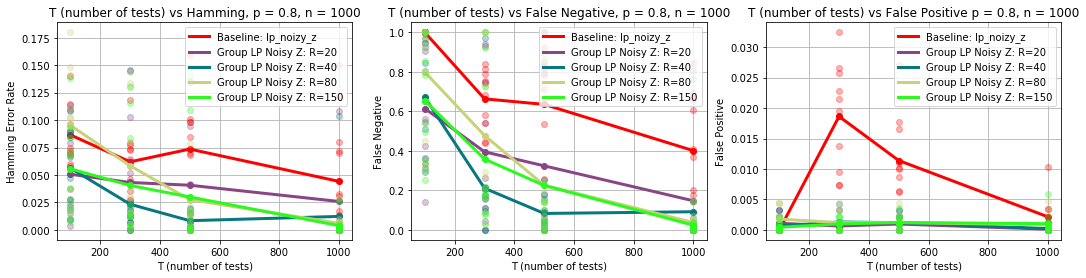

In [44]:
n = 1000                      # size of population
m = 200                         #number of families
p = 0.8                         #probability of infection
q = 0.1                         #probability of a family to be chosen as infected                       #number of tests
p_noisy = 0.1     
T_list = [100,300,500,1000]
num_trial = 10

fig = plt.figure(1)
Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial,decoder.lp_noisy_z)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,'red','Baseline: lp_noizy_z')
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())

Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial,decoder.alternate_lp_z_noise,0,20)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[5],'Group LP Noisy Z: R=20')
 
Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial,decoder.alternate_lp_z_noise,0,40)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[30],'Group LP Noisy Z: R=40')

Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial,decoder.alternate_lp_z_noise,0,80)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[60],'Group LP Noisy Z: R=80')

Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial,decoder.alternate_lp_z_noise,0,150)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[90],'Group LP Noisy Z: R=150')

In [8]:
n = 1000                      # size of population
m = 200                         #number of families
p = 0.8                         #probability of infection
q = 0.1                         #probability of a family to be chosen as infected                       #number of tests
p_noisy = 0.1     
T_list = [100,300,500,1000]
num_trial = 10

m = 200
fig = plt.figure(1)
Hamming_err_lists, FN_lists, FP_lists = run_lp_trials_z(n, m, p, q, T_list, num_trial,decoder.lp_noisy_z)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,'red','Baseline: lp_noizy_z')
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())

Hamming_err_lists, FN_lists, FP_lists = run_lp_trials_z(n, m, p, q, T_list, num_trial,decoder.alternate_lp_z_noise,0,30)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[5],'Group LP Noisy Z: R=30')

Hamming_err_lists, FN_lists, FP_lists = run_lp_trials_z(n, m, p, q, T_list, num_trial,decoder.alternate_lp_z_noise,0,40)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[30],'Group LP Noisy Z: R=40')

Hamming_err_lists, FN_lists, FP_lists = run_lp_trials_z(n, m, p, q, T_list, num_trial,decoder.alternate_lp_z_noise,0,50)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[60],'Group LP Noisy Z: R=50')

Hamming_err_lists, FN_lists, FP_lists = run_lp_trials_z(n, m, p, q, T_list, num_trial,decoder.alternate_lp_z_noise,0,60)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[90],'Group LP Noisy Z: R=60')

# Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial,decoder.alternate_lp_z_noise,0,70)
# make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[90],'Group LP Noisy Z: R=70')

NameError: name 'run_lp_trials_z' is not defined

<Figure size 432x288 with 0 Axes>

In [101]:
def run_lp_trials_Bsc(n, m, p, q, T_list, num_trial,func=decoder.lp,notgroup = 1,testfunc=1):
    Hamming_err_lists = []
    FN_lists = []
    FP_lists = []

    for i in range(num_trial):
        Hamming_err_list = []
        FN_list = []
        FP_list = []

        for T in T_list:
            X, ppl, y, A= decoder.generator_nonoverlapping(n, q, p, m, T)
            y_noisy = decoder.add_noise_bsc(y,0.1)
            if notgroup:
                ppl_pred  = func(X,y_noisy,1,1)
                ppl_pred = np.around(ppl_pred)
            else:
                if testfunc:
                    ppl_pred  = func(X,y_noisy,A,T,1,(-pow(T-500,2)/100)+3000)
                else:
                    ppl_pred  = func(X,y_noisy,A,T,1,2n-abs(T-n/2))
                    
                ppl_pred = np.around(ppl_pred)

            print("Solved Trial: ",i, " for T=",T)
            Hamming_err = sum(ppl_pred != ppl)/n
            Hamming_err_list.append(Hamming_err)

            positive_mask = (ppl == 1)
            FN = sum(ppl_pred[positive_mask] == 0) / sum(positive_mask)
            FN_list.append(FN)

            negative_mask = (ppl == 0)
            FP = sum(ppl_pred[negative_mask] == 1) / sum(negative_mask)
            FP_list.append(FP)

        Hamming_err_lists.append(Hamming_err_list)
        FN_lists.append(FN_list)
        FP_lists.append(FP_list)
    
    return Hamming_err_lists, FN_lists, FP_lists, ppl_pred

SyntaxError: invalid syntax (<ipython-input-101-e15ee87ef337>, line 21)

In [106]:
m=200
num_trial = 5
fig = plt.figure(1)
Hamming_err_lists, FN_lists, FP_lists,ppl_pred_1 = run_lp_trials_Bsc(n, m, p, q, T_list, num_trial,decoder.lp_noisy_bsc)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,'red','Baseline: lp_noizy_bsc')
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())

Hamming_err_lists, FN_lists, FP_lists,ppl_pred_2 = run_lp_trials_Bsc(n, m, p, q, T_list, num_trial,decoder.alternate_lp_bsc,0)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[5],'Group LP Noisy Z: M=-(T-500)^2/100 + 3000')

Hamming_err_lists, FN_lists, FP_lists,ppl_pred_2 = run_lp_trials_Bsc(n, m, p, q, T_list, num_trial,decoder.alternate_lp_bsc,0,0)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[80],'Group LP Noisy Z: M=2n-abs(T-n/2)')



# Hamming_err_lists, FN_lists, FP_lists,ppl_pred = run_lp_trials_Bsc(n, m, p, q, T_list, num_trial,decoder.alternate_lp_bsc,0,n)
# make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[30],'Group LP Noisy Z: R=50')

# Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial,decoder.alternate_lp_bsc,0,50)
# make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[60],'Group LP Noisy Z: R=50')

# Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial,decoder.alternate_lp_bsc,0,60)
# make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[90],'Group LP Noisy Z: R=60')

TypeError: lp_noisy_bsc() takes 2 positional arguments but 4 were given

<Figure size 432x288 with 0 Axes>

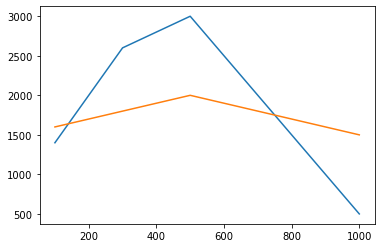

In [104]:
plt.plot(T_list,(-np.power(np.array(T_list)-500,2)/100)+3000)
plt.plot(T_list,2000-abs(np.array(T_list)-500))